In [2]:
!pip install tensorflow

  Using cached tensorflow-2.7.0-cp39-cp39-win_amd64.whl (430.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached libclang-12.0.0-py2.py3-none-win_amd64.whl (13.1 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached wrapt-1.13.3-cp39-cp39-win_amd64.whl (34 kB)
  Using cached grpcio-1.42.0-cp39-cp39-win_amd64.whl (3.3 MB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached typing_extensions-4.0.1-py3-none-any.whl (22 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached protobuf-3.19.1-cp39-cp39-win_amd64.whl (895 kB)
  Using cached wheel-0.37.0-py2.py3-none-any.

In [7]:
# import dependencies
import tensorflow as tf

In [9]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [51]:
# setup the training data
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [17]:
list(enumerate(celsius_q))
# print(len(celsius_q))

[(0, -40.0), (1, -10.0), (2, 0.0), (3, 8.0), (4, 15.0), (5, 22.0), (6, 38.0)]

In [19]:
# view data

for index,celcius in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(celcius, fahrenheit_a[index]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [20]:
# create the model

layer_zero = tf.keras.layers.Dense(input_shape=[1], units=1)

# Assemble the layer into the model

model = tf.keras.Sequential(layers=layer_zero)

In [21]:
# compile the model with loss and optimizer function
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [22]:
# train the model

history = model.fit(celsius_q,fahrenheit_a,epochs=500,verbose=False)
print("Training is completed successfully")

Training is completed successfully


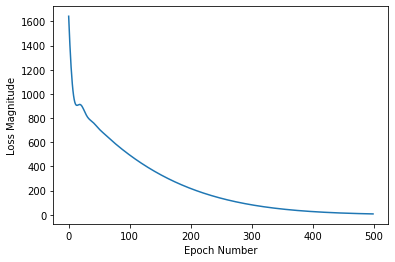

In [23]:
# Display training statistics
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [28]:
# train the model
for epoch in range(500):
    hist = model.fit(celsius_q,fahrenheit_a,epochs=epoch,verbose=False)
    print(f"The mse loss for {epoch} is {hist.history.get('loss')}")


The mse loss for 0 is None
The mse loss for 1 is [7.0892486572265625]
The mse loss for 2 is [6.9906816482543945, 6.893367290496826]
The mse loss for 3 is [6.797280311584473, 6.702433109283447, 6.608786582946777]
The mse loss for 4 is [6.5163493156433105, 6.425087928771973, 6.335005760192871, 6.246090412139893]
The mse loss for 5 is [6.1583123207092285, 6.07167911529541, 5.986158847808838, 5.901744365692139, 5.818428993225098]
The mse loss for 6 is [5.736193656921387, 5.655025959014893, 5.574918270111084, 5.495852947235107, 5.4178266525268555, 5.340812683105469]
The mse loss for 7 is [5.2648234367370605, 5.189826011657715, 5.115814208984375, 5.042773723602295, 4.970695495605469, 4.899575233459473, 4.82938814163208]
The mse loss for 8 is [4.760127544403076, 4.691798210144043, 4.624383449554443, 4.557849884033203, 4.49221134185791, 4.427453517913818, 4.363561153411865, 4.300525188446045]
The mse loss for 9 is [4.238316535949707, 4.176955223083496, 4.116413593292236, 4.0566935539245605, 3.

In [29]:
# use the model to predict values

print(model.predict([100.0]))

[[211.65302]]


In [39]:
f = (c * 1.8) + 32
c =100
print(f)

def temp_in_fah(c):
    return (c * 1.8) + 32



212.0


In [43]:
fah = list(map(lambda c:(c * 1.8) + 32,celsius_q))

for i,f in enumerate(fah):
    print(f'{round(f,0)} is the calculated value and {fahrenheit_a[i]} is the actual value')

-40.0 is the calculated value and -40.0 is the actual value
14.0 is the calculated value and 14.0 is the actual value
32.0 is the calculated value and 32.0 is the actual value
46.0 is the calculated value and 46.0 is the actual value
59.0 is the calculated value and 59.0 is the actual value
72.0 is the calculated value and 72.0 is the actual value
100.0 is the calculated value and 100.0 is the actual value


In [46]:
list(map(lambda f: round(f,0),fah)) == fahrenheit_a

array([ True,  True,  True,  True,  True,  True,  True])

In [42]:
celsius_q

array([-40., -10.,   0.,   8.,  15.,  22.,  38.])

In [41]:
fah

[-40.0, 14.0, 32.0, 46.4, 59.0, 71.6, 100.4]

In [32]:
# output the input data (model weight and bias)
print("These are the layer variables: {}".format(model.get_weights()))

These are the layer variables: [array([[1.7970141]], dtype=float32), array([31.951591], dtype=float32)]


In [52]:
# Using more Dense layer

layer_zero = tf.keras.layers.Dense(units=4, input_shape=[1])
layer_one = tf.keras.layers.Dense(units=4)
layer_two = tf.keras.layers.Dense(units=1)

In [53]:
model = tf.keras.Sequential([layer_zero, layer_one, layer_two])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


In [54]:
print(model.predict([100.0]))

[[211.74744]]


In [55]:
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))

Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit


In [56]:
print("These are the layer_zero variables: {}".format(layer_zero.get_weights()))
print("These are the layer_one variables: {}".format(layer_one.get_weights()))
print("These are the layer_two variables: {}".format(layer_two.get_weights()))

These are the layer_zero variables: [array([[ 0.2911434 ,  0.5438753 , -0.691165  ,  0.08158711]],
      dtype=float32), array([-2.0776937,  3.4306235, -3.4362264,  2.8853865], dtype=float32)]
These are the layer_one variables: [array([[-0.13633074, -0.84584683, -0.70674604,  0.09226831],
       [-0.8909136 ,  0.84588534,  0.22828767, -0.11438222],
       [-0.01514568, -0.33701077, -1.0420084 , -0.60631317],
       [-0.33704144,  0.8122617 ,  0.44657645, -0.04937232]],
      dtype=float32), array([-2.7929287,  3.3727326,  3.2594082,  1.5251908], dtype=float32)]
These are the layer_two variables: [array([[-0.76702785],
       [ 0.75309736],
       [ 1.4281577 ],
       [ 0.08532822]], dtype=float32), array([3.2207758], dtype=float32)]
